In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings  
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
warnings.filterwarnings('ignore')

In [16]:
# Load dataset
df = pd.read_csv(r"D:\jupyter\archive (2)\Youtube-Spam-Dataset.csv")

In [33]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,info,info_cleaned
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,"Julius NM PSY - GANGNAM STYLE(?????) M/V Huh, ...","julius nm psy - gangnam style(?????) m/v huh, ..."
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,adam riyati PSY - GANGNAM STYLE(?????) M/V Hey...,adam riyati psy - gangnam style(?????) m/v hey...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,Evgeny Murashkin PSY - GANGNAM STYLE(?????) M/...,evgeny murashkin psy - gangnam style(?????) m/...
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,ElNino Melendez PSY - GANGNAM STYLE(?????) M/V...,elnino melendez psy - gangnam style(?????) m/v...
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,GsMega PSY - GANGNAM STYLE(?????) M/V watch?v=...,gsmega psy - gangnam style(?????) m/v watch?v=...


In [17]:
# Data Preprocessing
df['info'] = df["AUTHOR"] + " " + df["VIDEO_NAME"] + " " + df["CONTENT"]
df['info_cleaned'] = df['info'].str.lower()

In [18]:
# Target Variable
y = df['CLASS']


In [19]:
# Feature Extraction
cv = CountVectorizer(max_features=5000, stop_words='english')
x = cv.fit_transform(df["info_cleaned"]).toarray()

In [20]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [21]:
# Define Base Models
lr = LogisticRegression(multi_class='multinomial')
rf = RandomForestClassifier(n_estimators=100, random_state=21)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=21)
svc = LinearSVC()
dtc = DecisionTreeClassifier(max_depth=19, random_state=21)

In [28]:
def evaluate_model(model, x_train, x_test, y_train, y_test, cmap='Blues'):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test) * 100
    y_pred = model.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {score:.2f}%")
    sns.heatmap(cf_matrix, annot=True, cmap=cmap)
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 96.68%


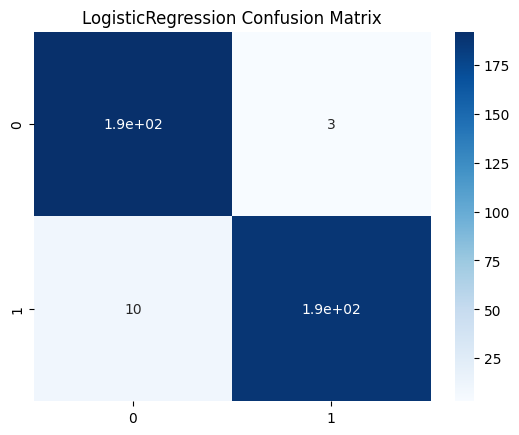

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       195
           1       0.98      0.95      0.97       197

    accuracy                           0.97       392
   macro avg       0.97      0.97      0.97       392
weighted avg       0.97      0.97      0.97       392

RandomForestClassifier Accuracy: 97.19%


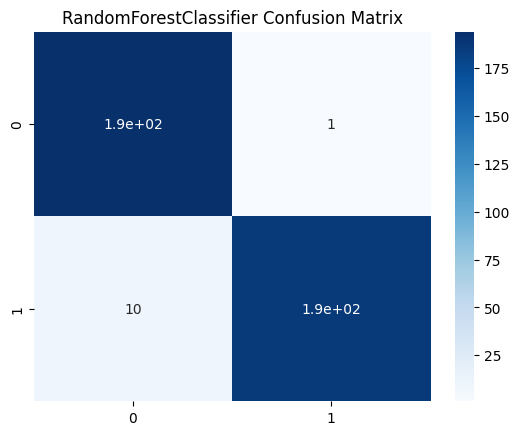

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       195
           1       0.99      0.95      0.97       197

    accuracy                           0.97       392
   macro avg       0.97      0.97      0.97       392
weighted avg       0.97      0.97      0.97       392

GradientBoostingClassifier Accuracy: 94.90%


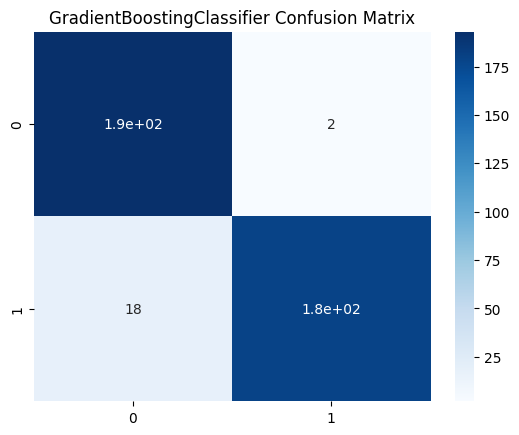

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       195
           1       0.99      0.91      0.95       197

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

LinearSVC Accuracy: 97.70%


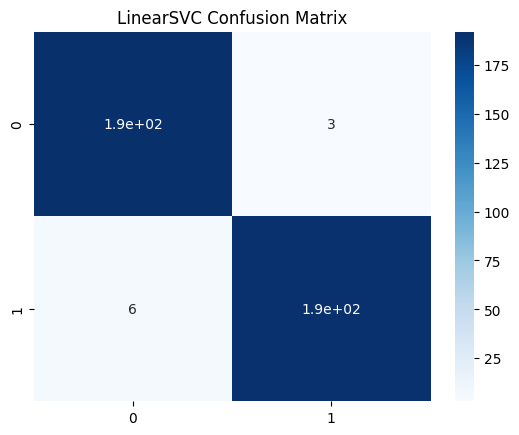

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       195
           1       0.98      0.97      0.98       197

    accuracy                           0.98       392
   macro avg       0.98      0.98      0.98       392
weighted avg       0.98      0.98      0.98       392

DecisionTreeClassifier Accuracy: 95.66%


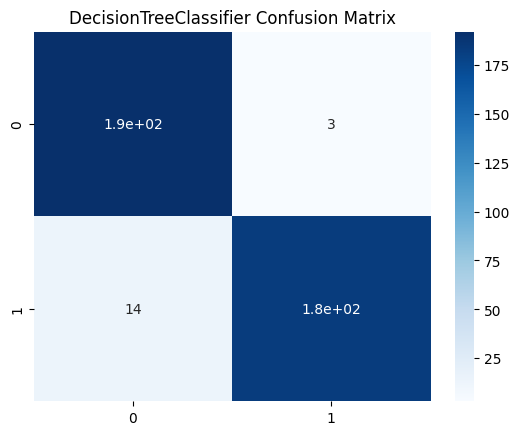

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       195
           1       0.98      0.93      0.96       197

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [29]:
models = [lr, rf, gbc, svc, dtc]
for model in models:
    evaluate_model(model, x_train, x_test, y_train, y_test)

VotingClassifier Accuracy: 97.45%


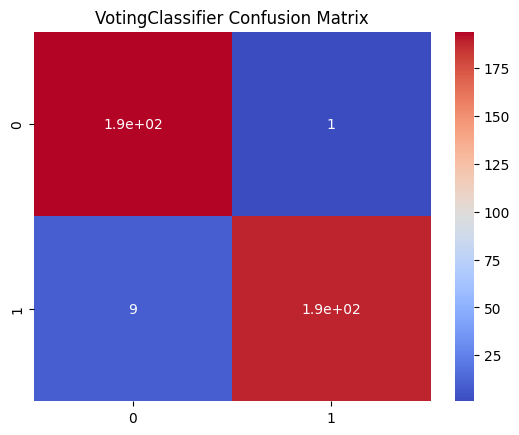

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       195
           1       0.99      0.95      0.97       197

    accuracy                           0.97       392
   macro avg       0.98      0.97      0.97       392
weighted avg       0.98      0.97      0.97       392

StackingClassifier Accuracy: 98.47%


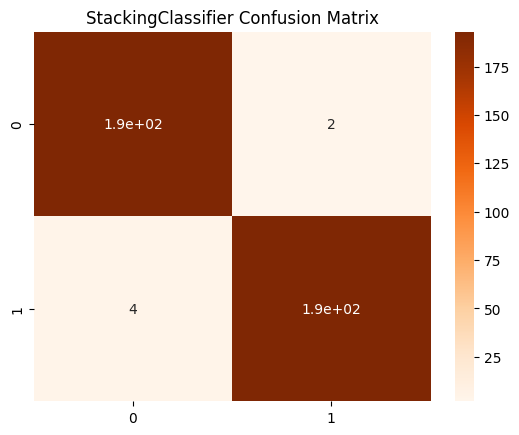

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       195
           1       0.99      0.98      0.98       197

    accuracy                           0.98       392
   macro avg       0.98      0.98      0.98       392
weighted avg       0.98      0.98      0.98       392



In [30]:
# Ensemble Learning
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('gbc', gbc),
    ('svc', svc),
    ('dtc', dtc)
], voting='hard')
evaluate_model(voting_clf, x_train, x_test, y_train, y_test, cmap='coolwarm')

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('gbc', gbc), ('svc', svc)],
    final_estimator=LogisticRegression()
)
evaluate_model(stacking_clf, x_train, x_test, y_train, y_test, cmap='Oranges')

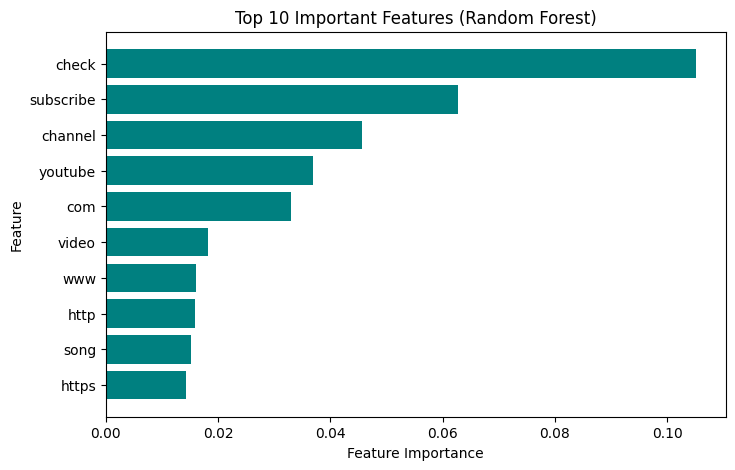

In [31]:
# Feature Importance Visualization for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
feature_names = np.array(cv.get_feature_names_out())[indices]

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances[indices], color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


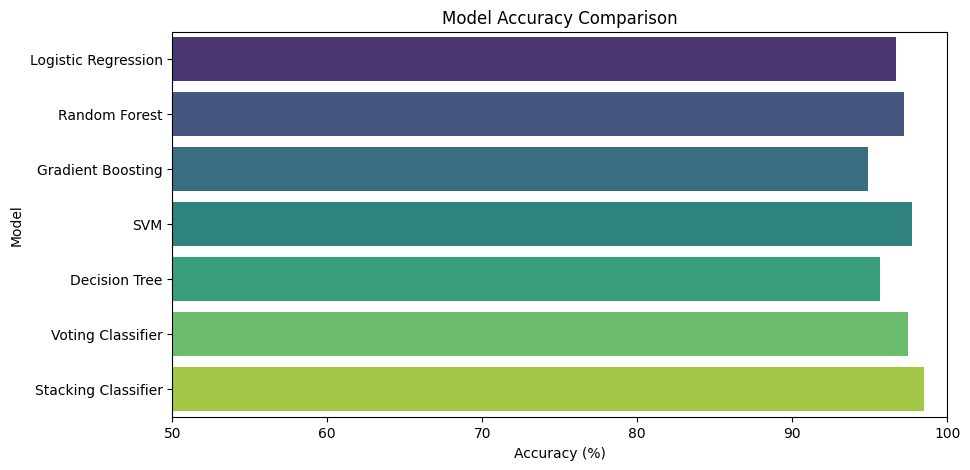

In [32]:
# Accuracy Comparison Bar Chart
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM", "Decision Tree", "Voting Classifier", "Stacking Classifier"]
accuracies = [lr.score(x_test, y_test)*100, rf.score(x_test, y_test)*100, gbc.score(x_test, y_test)*100, 
              svc.score(x_test, y_test)*100, dtc.score(x_test, y_test)*100, voting_clf.score(x_test, y_test)*100, stacking_clf.score(x_test, y_test)*100]

plt.figure(figsize=(10, 5))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.xlim(50, 100)
plt.show()